# Evaluation

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt


## Sessions

### unconstrained

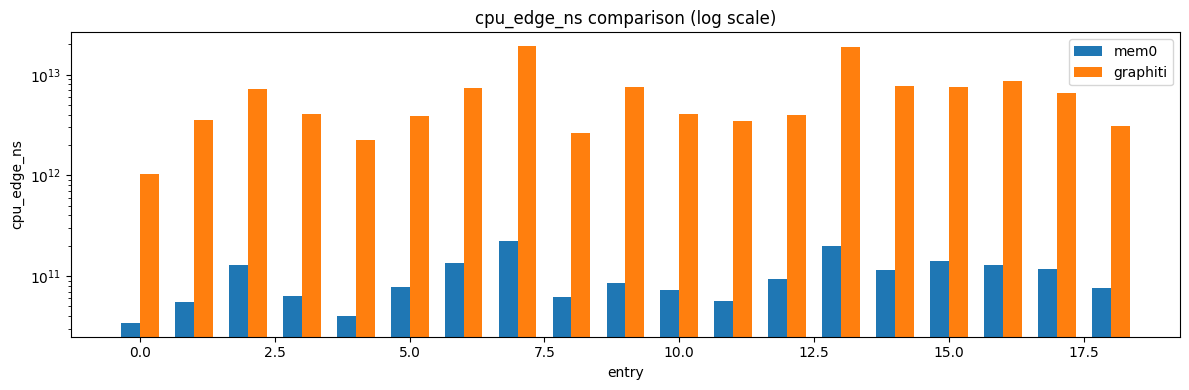

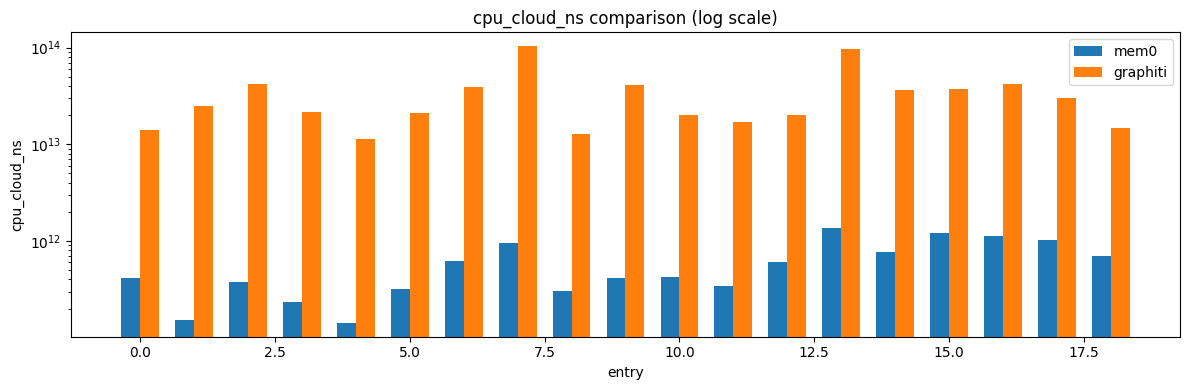

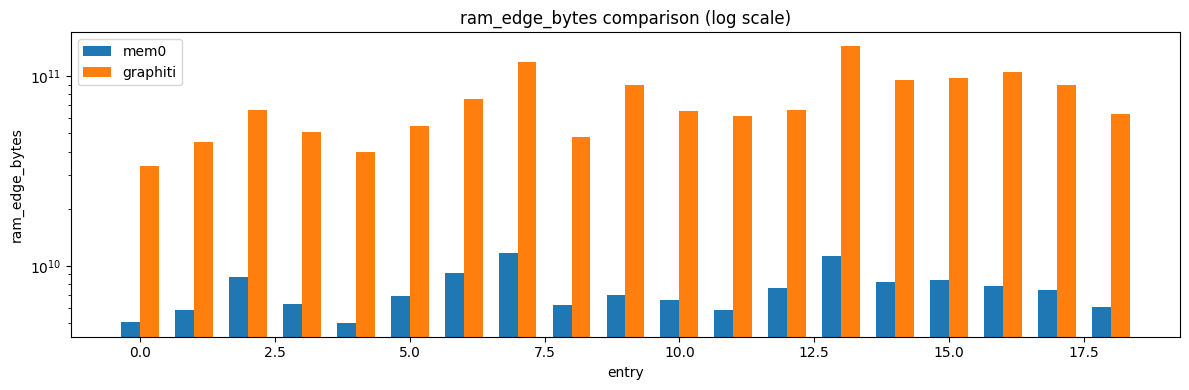

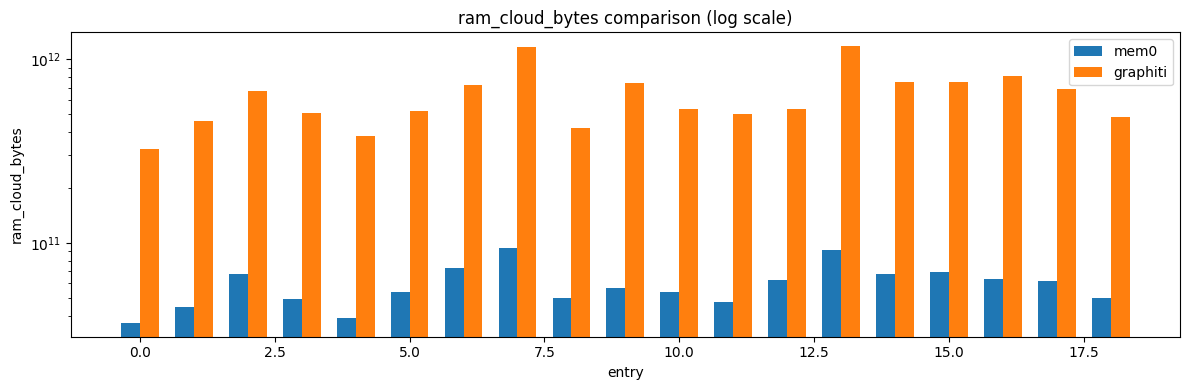

C:\Users\bjpw\AppData\Local\Temp\ipykernel_31616\1356552543.py:45: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


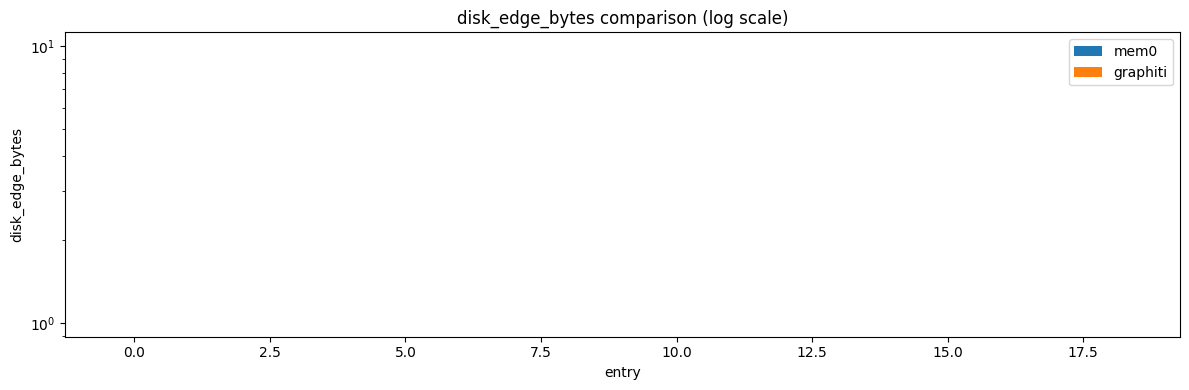

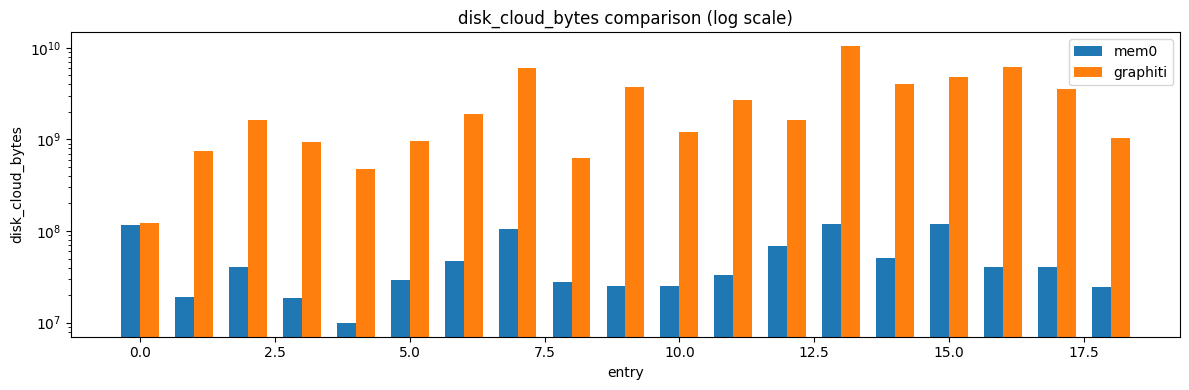

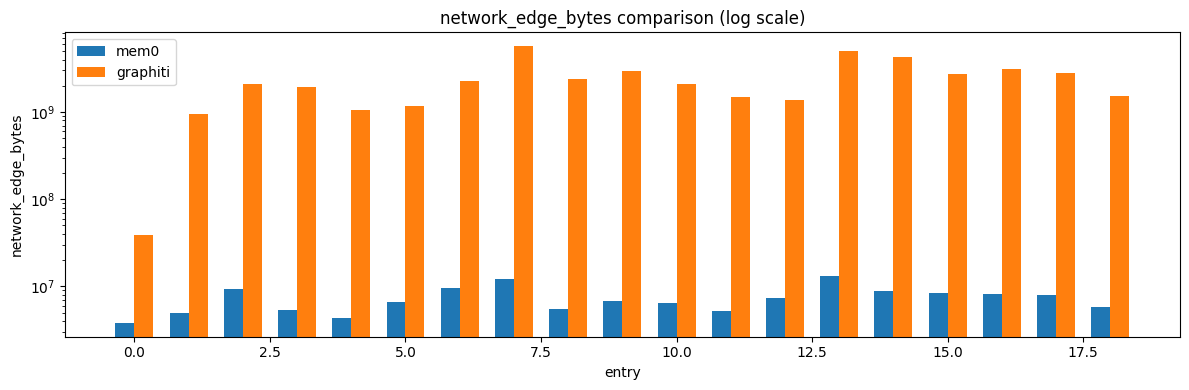

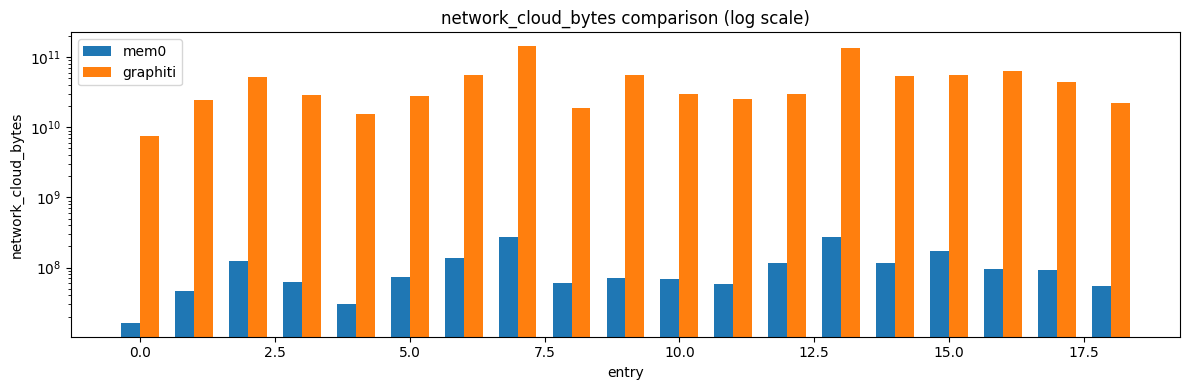

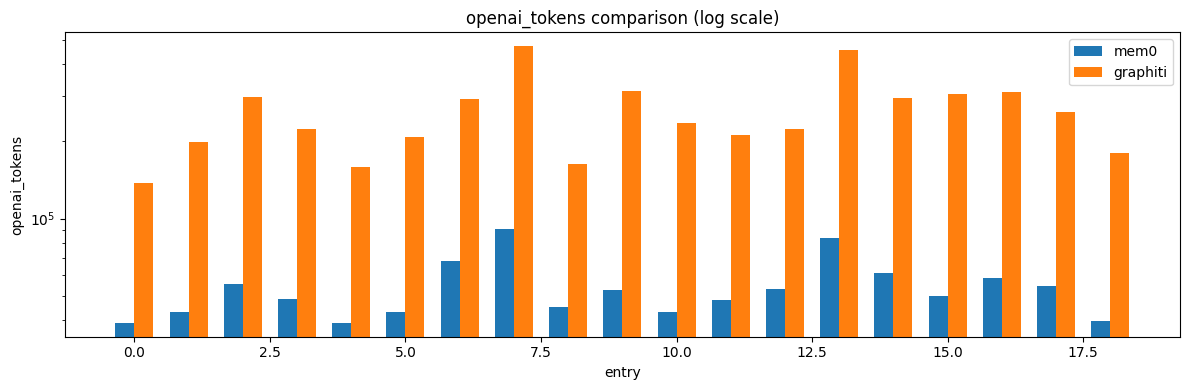

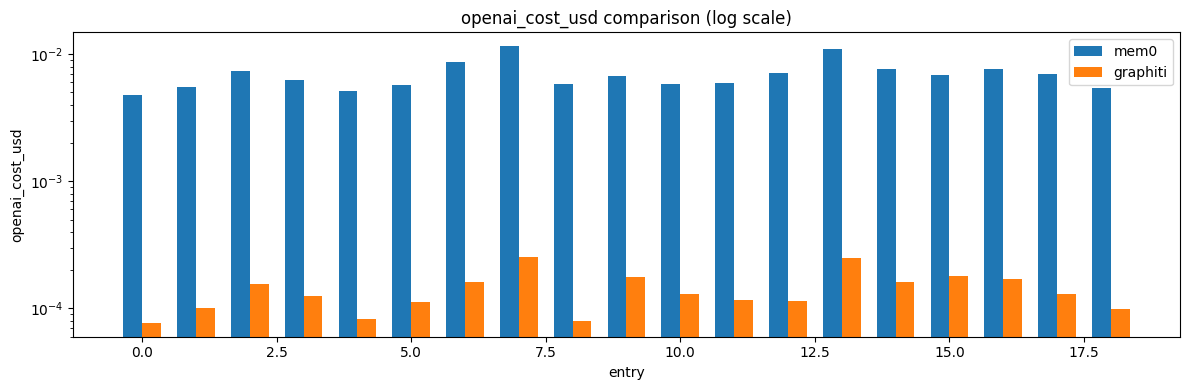

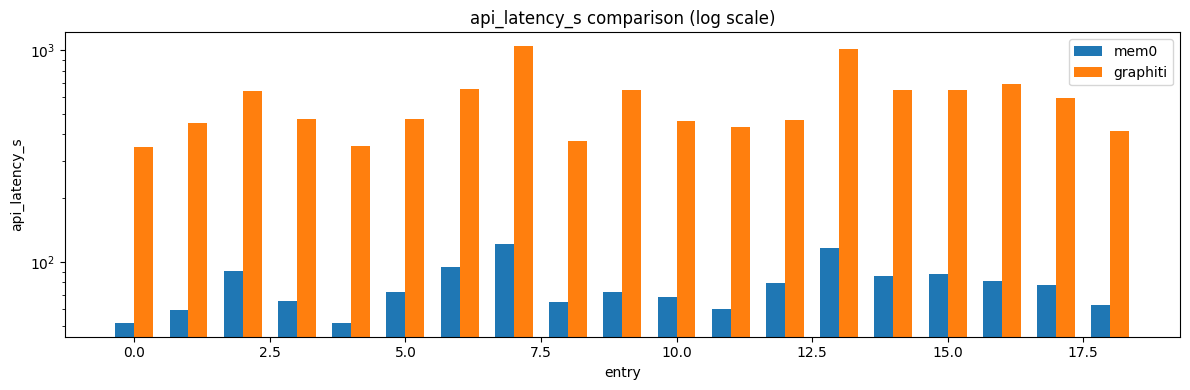

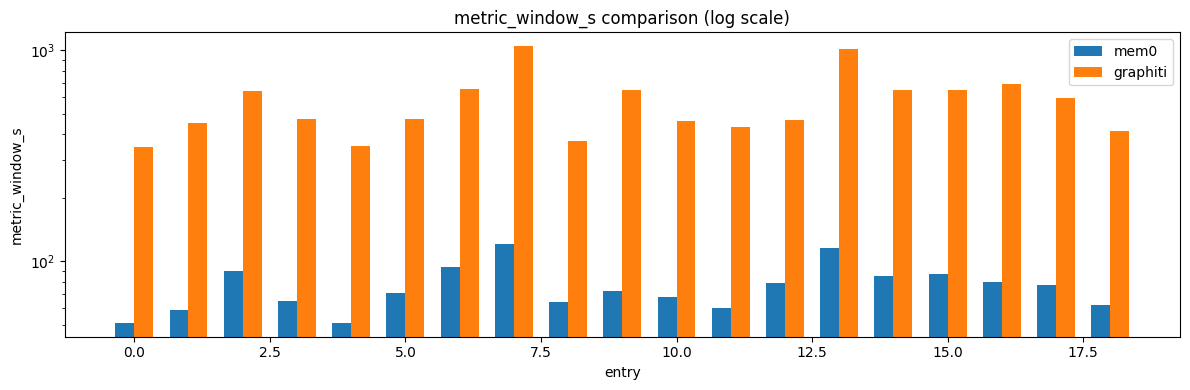

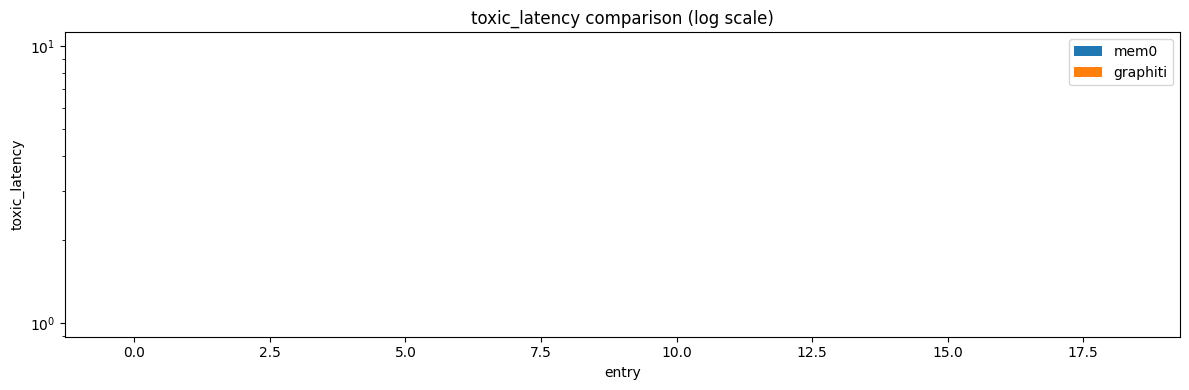

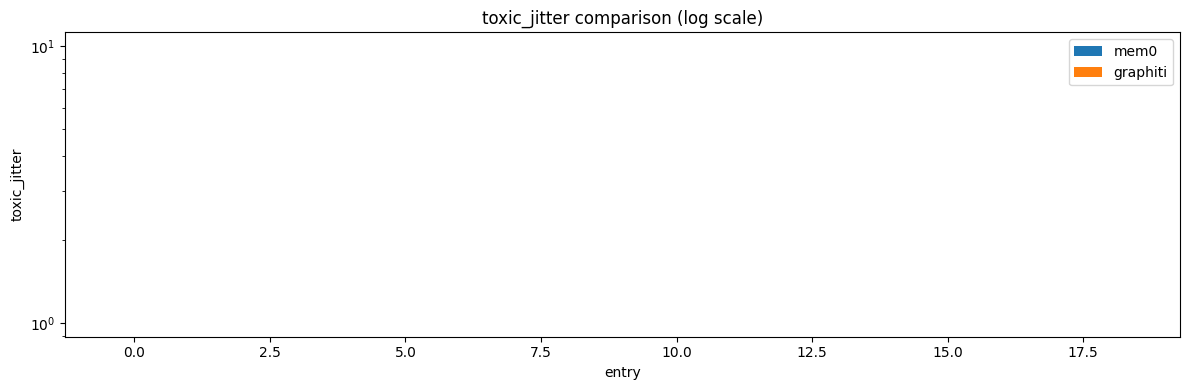

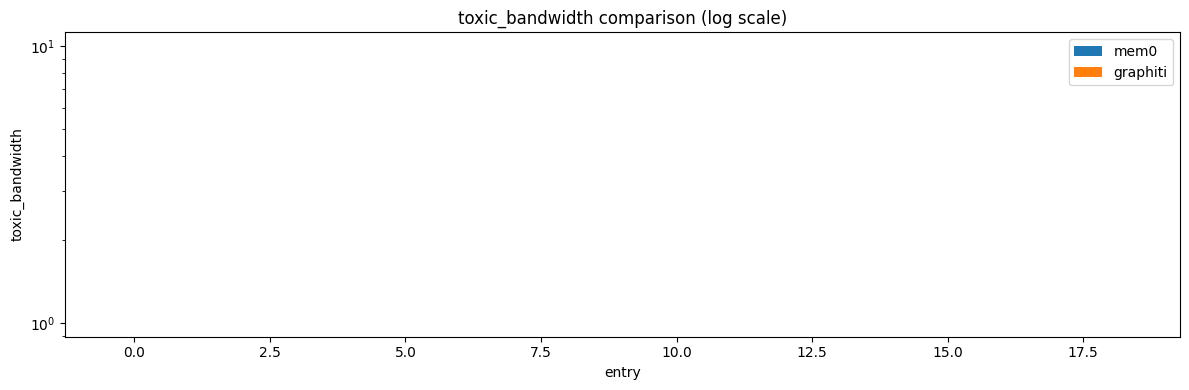

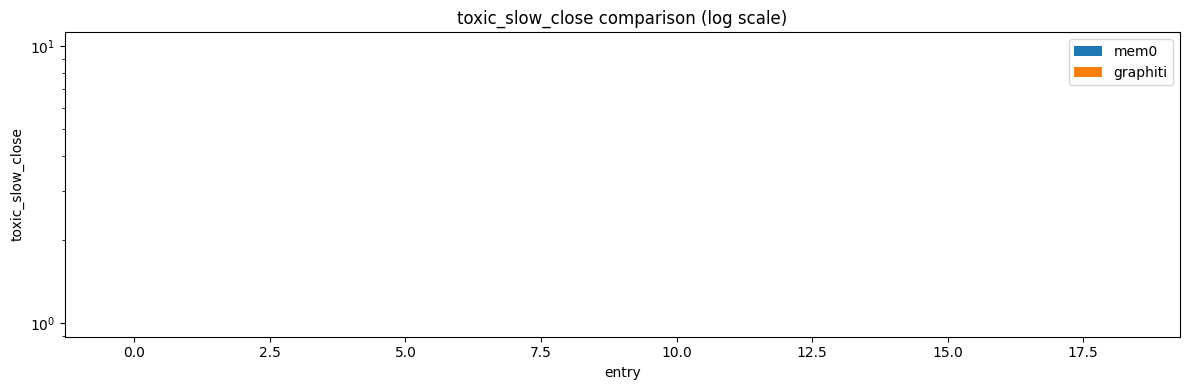

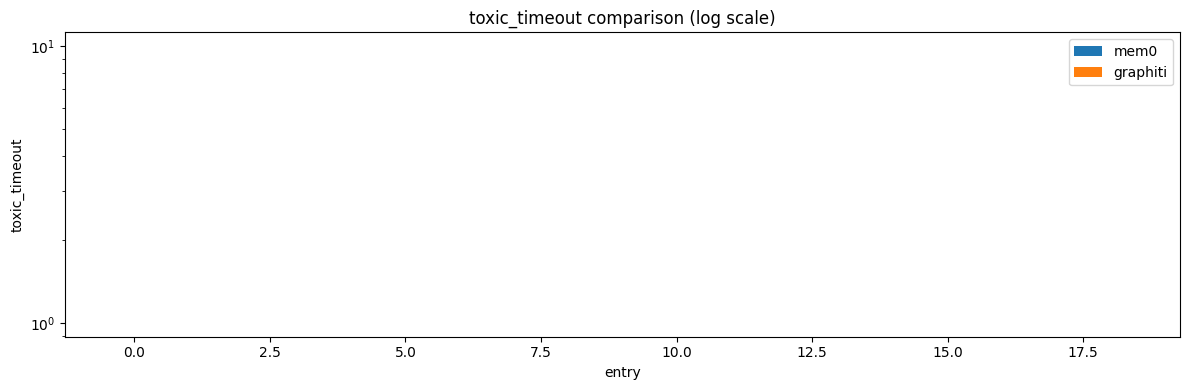

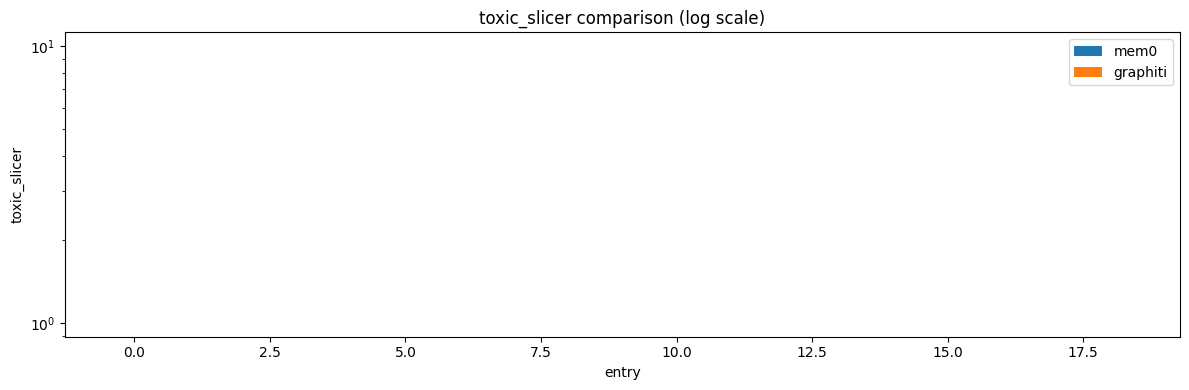

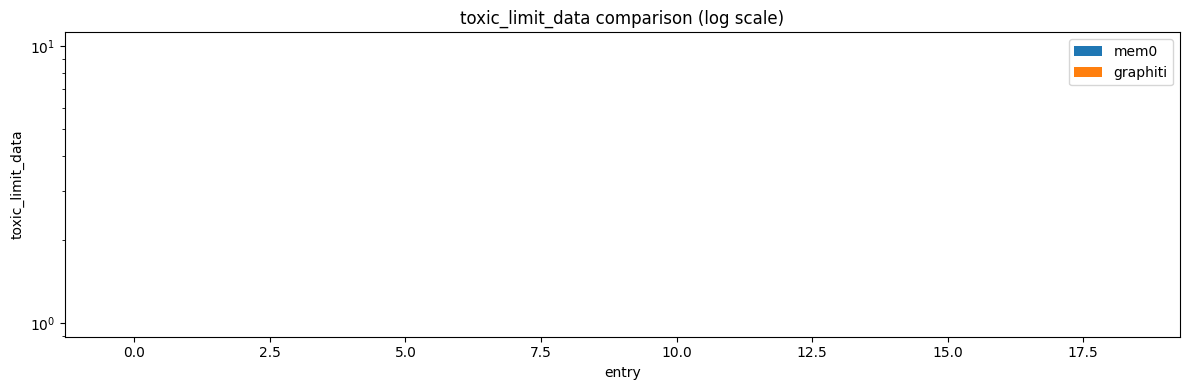

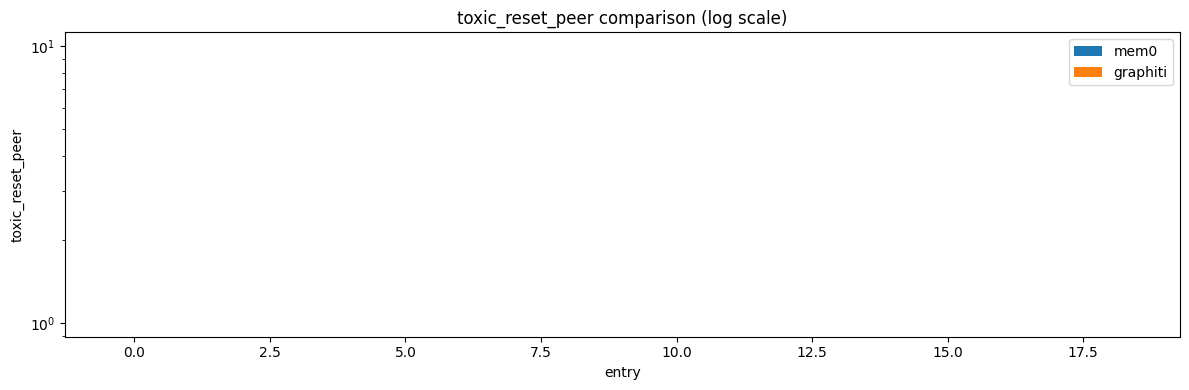

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

mem_file = 'results/mem0_conv_0_sessions.csv'
graphiti_file = 'results/graphiti_conv_0_sessions.csv'

metrics = [
    "cpu_edge_ns","cpu_cloud_ns","ram_edge_bytes","ram_cloud_bytes",
    "disk_edge_bytes","disk_cloud_bytes","network_edge_bytes","network_cloud_bytes",
    "openai_tokens","openai_cost_usd","api_latency_s","metric_window_s",
    "toxic_latency","toxic_jitter","toxic_bandwidth","toxic_slow_close",
    "toxic_timeout","toxic_slicer","toxic_limit_data","toxic_reset_peer"
]

mem = pd.read_csv(mem_file)
graphiti = pd.read_csv(graphiti_file)

common_id_cols = [c for c in ["id","session_id","session","uid"] if c in mem.columns and c in graphiti.columns]
if common_id_cols:
    id_col = common_id_cols[0]
    left = mem.set_index(id_col)
    right = graphiti.set_index(id_col)
    df = left.join(right, how="outer", lsuffix="_mem", rsuffix="_graphiti")
    align_on_index = True
else:
    min_len = min(len(mem), len(graphiti))
    mem = mem.iloc[:min_len].reset_index(drop=True)
    graphiti = graphiti.iloc[:min_len].reset_index(drop=True)
    df = pd.concat([mem.add_suffix("_mem"), graphiti.add_suffix("_graphiti")], axis=1)
    align_on_index = False

os.makedirs('plots/sessions/unconstrained', exist_ok=True)

for metric in metrics:
    mem_col = f"{metric}_mem" if align_on_index or f"{metric}_mem" in df.columns else metric
    graphiti_col = f"{metric}_graphiti" if align_on_index or f"{metric}_graphiti" in df.columns else metric
    if mem_col not in df.columns or graphiti_col not in df.columns:
        continue
    plt.figure(figsize=(12,4))
    width = 0.35
    indices = range(len(df))
    plt.bar([i - width/2 for i in indices], df[mem_col], width=width, label='mem0')
    plt.bar([i + width/2 for i in indices], df[graphiti_col], width=width, label='graphiti')
    plt.yscale('log')
    plt.xlabel('entry')
    plt.ylabel(metric)
    plt.title(f'{metric} comparison (log scale)')
    plt.legend()
    plt.tight_layout()
    outpath = os.path.join('plots/sessions/unconstrained', f'compare_{metric}_log.png')
    plt.savefig(outpath)
    plt.show()
    plt.close()

### constrained

FileNotFoundError: [Errno 2] No such file or directory: 'plots/sessions/constrained\\compare_cpu_edge_ns_log.png'

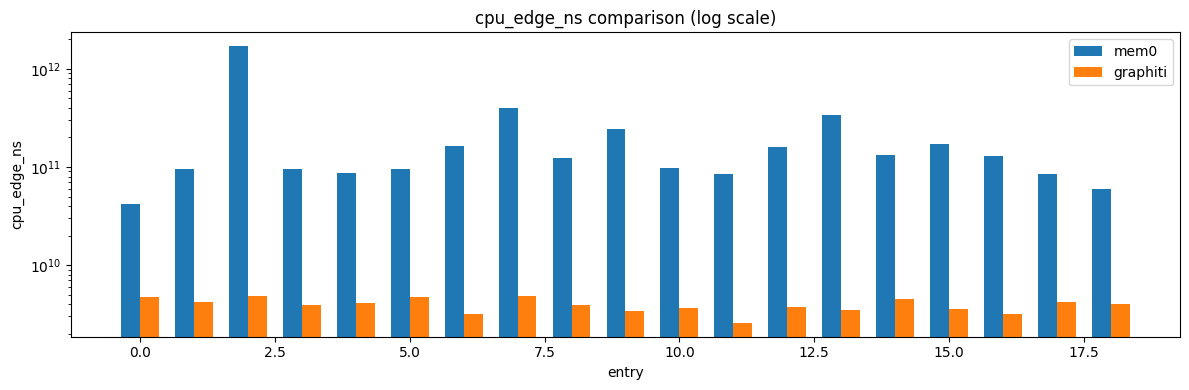

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

mem_file = 'results/mem0_conv_0_sessions_constrained.csv'
graphiti_file = 'results/graphiti_conv_0_sessions_constrained.csv'

metrics = [
    "similarity_string","similarity_semantic","similarity",
    "cpu_edge_ns","cpu_cloud_ns","ram_edge_bytes","ram_cloud_bytes",
    "disk_edge_bytes","disk_cloud_bytes","network_edge_bytes","network_cloud_bytes",
    "openai_tokens","openai_cost_usd","api_latency_s","metric_window_s",
    "toxic_latency","toxic_jitter","toxic_bandwidth","toxic_slow_close",
    "toxic_timeout","toxic_slicer","toxic_limit_data","toxic_reset_peer"
]

mem = pd.read_csv(mem_file)
graphiti = pd.read_csv(graphiti_file)

common_id_cols = [c for c in ["id","session_id","session","uid"] if c in mem.columns and c in graphiti.columns]
if common_id_cols:
    id_col = common_id_cols[0]
    left = mem.set_index(id_col)
    right = graphiti.set_index(id_col)
    df = left.join(right, how="outer", lsuffix="_mem", rsuffix="_graphiti")
    align_on_index = True
else:
    min_len = min(len(mem), len(graphiti))
    mem = mem.iloc[:min_len].reset_index(drop=True)
    graphiti = graphiti.iloc[:min_len].reset_index(drop=True)
    df = pd.concat([mem.add_suffix("_mem"), graphiti.add_suffix("_graphiti")], axis=1)
    align_on_index = False

os.makedirs('plots/sessions/constrained', exist_ok=True)

for metric in metrics:
    mem_col = f"{metric}_mem" if align_on_index or f"{metric}_mem" in df.columns else metric
    graphiti_col = f"{metric}_graphiti" if align_on_index or f"{metric}_graphiti" in df.columns else metric
    if mem_col not in df.columns or graphiti_col not in df.columns:
        continue
    plt.figure(figsize=(12,4))
    width = 0.35
    indices = range(len(df))
    plt.bar([i - width/2 for i in indices], df[mem_col], width=width, label='mem0')
    plt.bar([i + width/2 for i in indices], df[graphiti_col], width=width, label='graphiti')
    plt.yscale('log')
    plt.xlabel('entry')
    plt.ylabel(metric)
    plt.title(f'{metric} comparison (log scale)')
    plt.legend()
    plt.tight_layout()
    outpath = os.path.join('plots/sessions/constrained', f'compare_{metric}_log.png')
    plt.savefig(outpath)
    plt.show()
    plt.close()

## QA

### unconstrained

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Focused QA files
qa_mem_file = 'results/mem0_conv_0_qa.csv'
qa_graphiti_file = 'results/graphiti_conv_0_qa.csv'

# Metrics to compare
metrics = [
    "similarity_string","similarity_semantic","similarity",
    "cpu_edge_ns","cpu_cloud_ns","ram_edge_bytes","ram_cloud_bytes",
    "disk_edge_bytes","disk_cloud_bytes","network_edge_bytes","network_cloud_bytes",
    "openai_tokens","openai_cost_usd","api_latency_s","metric_window_s",
    "toxic_latency","toxic_jitter","toxic_bandwidth","toxic_slow_close",
    "toxic_timeout","toxic_slicer","toxic_limit_data","toxic_reset_peer"
]

# Load QA CSVs
df_qa_mem = pd.read_csv(qa_mem_file)
df_qa_graphiti = pd.read_csv(qa_graphiti_file)

os.makedirs('plots/qa/unconstrained', exist_ok=True)

# Plot comparison for QA
for metric in metrics:
    if metric not in df_qa_mem.columns or metric not in df_qa_graphiti.columns:
        continue
    plt.figure(figsize=(12,4))
    width = 0.35
    indices = range(len(df_qa_mem))
    plt.bar([i - width/2 for i in indices], df_qa_mem[metric], width=width, label='mem0')
    plt.bar([i + width/2 for i in indices], df_qa_graphiti[metric], width=width, label='graphiti')
    plt.yscale('log')
    plt.xlabel('entry')
    plt.ylabel(metric)
    plt.title(f'{metric} QA comparison (log scale)')
    plt.legend()
    plt.tight_layout()
    outpath = os.path.join('plots/qa/unconstrained', f'compare_{metric}_qa_log.png')
    plt.savefig(outpath)
    plt.show()
    plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Focused QA files
qa_mem_file = 'results/mem0_conv_0_qa_constrained.csv'
qa_graphiti_file = 'results/graphiti_conv_0_qa_constrained.csv'

# Metrics to compare
metrics = [
    "similarity_string","similarity_semantic","similarity",
    "cpu_edge_ns","cpu_cloud_ns","ram_edge_bytes","ram_cloud_bytes",
    "disk_edge_bytes","disk_cloud_bytes","network_edge_bytes","network_cloud_bytes",
    "openai_tokens","openai_cost_usd","api_latency_s","metric_window_s",
    "toxic_latency","toxic_jitter","toxic_bandwidth","toxic_slow_close",
    "toxic_timeout","toxic_slicer","toxic_limit_data","toxic_reset_peer"
]

# Load QA CSVs
df_qa_mem = pd.read_csv(qa_mem_file)
df_qa_graphiti = pd.read_csv(qa_graphiti_file)

os.makedirs('plots/qa/constrained', exist_ok=True)

# Plot comparison for QA
for metric in metrics:
    if metric not in df_qa_mem.columns or metric not in df_qa_graphiti.columns:
        continue
    plt.figure(figsize=(12,4))
    width = 0.35
    indices = range(len(df_qa_mem))
    plt.bar([i - width/2 for i in indices], df_qa_mem[metric], width=width, label='mem0')
    plt.bar([i + width/2 for i in indices], df_qa_graphiti[metric], width=width, label='graphiti')
    plt.yscale('log')
    plt.xlabel('entry')
    plt.ylabel(metric)
    plt.title(f'{metric} QA comparison (log scale)')
    plt.legend()
    plt.tight_layout()
    outpath = os.path.join('plots/qa/constrained', f'compare_{metric}_qa_log.png')
    plt.savefig(outpath)
    plt.show()
    plt.close()